# Homework 05 - Data exploration

_Goal_ :

**Briefly explore the data from Hillary's emails dataset.**

_Tools_ :

**The tools used are :**

* pandas
* matplotlib / seaborn

---

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

We begin by listing all the files contained in the dataset, located in the `hillary_clinton` folder:

In [7]:
!ls -lh ./hillary-clinton-emails/

total 50352
-rwxr-xr-x  1 lazzari  wheel    20K Dec  2 10:02 Aliases.csv
-rwxr-xr-x  1 lazzari  wheel   117K Dec  2 10:02 EmailReceivers.csv
-rwxr-xr-x  1 lazzari  wheel    24M Dec  2 10:02 Emails.csv
-rwxr-xr-x  1 lazzari  wheel   9.9K Dec  2 10:02 Persons.csv
-rwxr-xr-x  1 lazzari  wheel   398B Dec  2 10:02 hashes.txt


## Aliases.csv

The first file maps aliases, which are used in email communications / software, to unique ids. This is useful since the same person can have several aliases.

In [8]:
# Read file
alias_df = pd.read_csv('hillary-clinton-emails/Aliases.csv')

# Print global information
print(alias_df.shape)
print(alias_df.dtypes)
print(alias_df.isnull().sum())
alias_df.head()

(850, 3)
Id           int64
Alias       object
PersonId     int64
dtype: object
Id          0
Alias       0
PersonId    0
dtype: int64


,Id,Alias,PersonId
0,1,111th congress,1
1,2,agna usemb kabul afghanistan,2
2,3,ap,3
3,4,asuncion,4
4,5,alec,5


In [4]:
print('Number of unique people:',alias_df.PersonId.nunique())

Number of unique people: 513


Note that it is indeed the same number than the one found below in [Persons.csv](#Persons.csv).

### Distributions of aliases / person

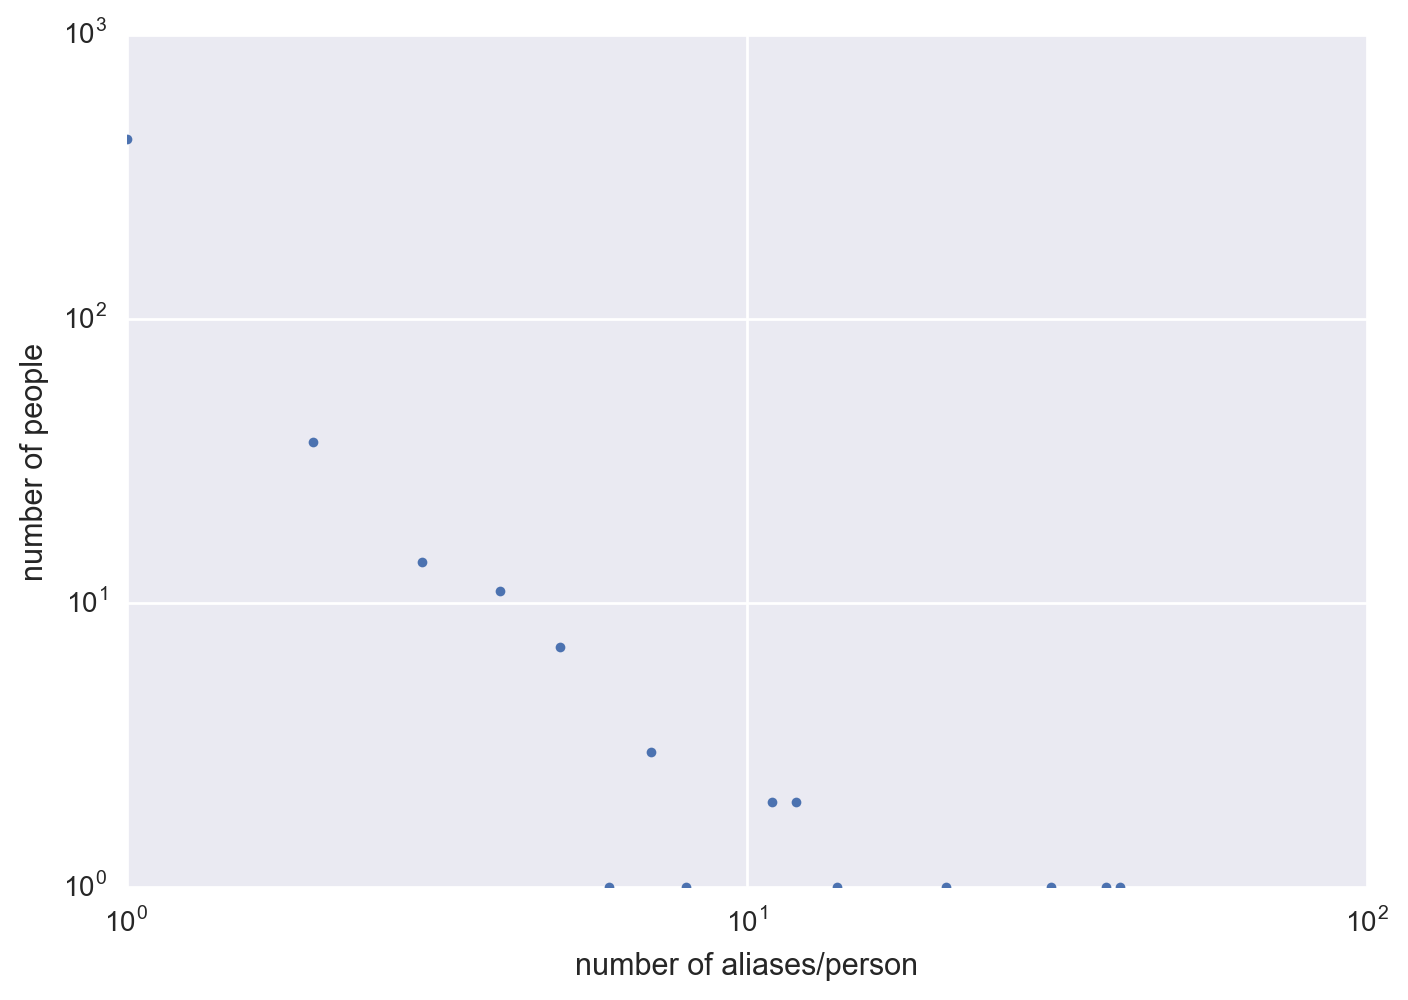

In [27]:
alias_dist = alias_df.PersonId.value_counts().value_counts()

plt.loglog(alias_dist,marker='.',linestyle='')
plt.xlabel('number of aliases/person')
plt.ylabel('number of people')

## Persons.csv

In [28]:
# Read file
persons_df = pd.read_csv('hillary-clinton-emails/Persons.csv')

# Print global information
print(persons_df.shape)
print(persons_df.dtypes)
print(persons_df.isnull().sum())
persons_df.head()

(513, 2)
Id       int64
Name    object
dtype: object
Id      0
Name    0
dtype: int64


,Id,Name
0,1,111th Congress
1,2,AGNA USEMB Kabul Afghanistan
2,3,AP
3,4,ASUNCION
4,5,Alec


In [29]:
print('number of unique poeple:',persons_df.Id.nunique())

number of unique poeple: 513


## EmailReceivers.csv

In [30]:
# Read file
receivers_df = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')

# Print global information
print(receivers_df.shape)
print(receivers_df.dtypes)
print(receivers_df.isnull().sum())
receivers_df.head()

(9306, 3)
Id          int64
EmailId     int64
PersonId    int64
dtype: object
Id          0
EmailId     0
PersonId    0
dtype: int64


,Id,EmailId,PersonId
0,1,1,80
1,2,2,80
2,3,3,228
3,4,3,80
4,5,4,80


We print the number of unique emails and people : mind that there are _less_ people than in [Persons.csv](#Persons.csv) :

In [31]:
print('Number of unique email (EmailId):', receivers_df.EmailId.nunique())
print('Number of unique receivers (PersonId):', receivers_df.PersonId.nunique())

Number of unique email (EmailId): 7676
Number of unique receivers (PersonId): 418


### Distribution of #receivers / mail

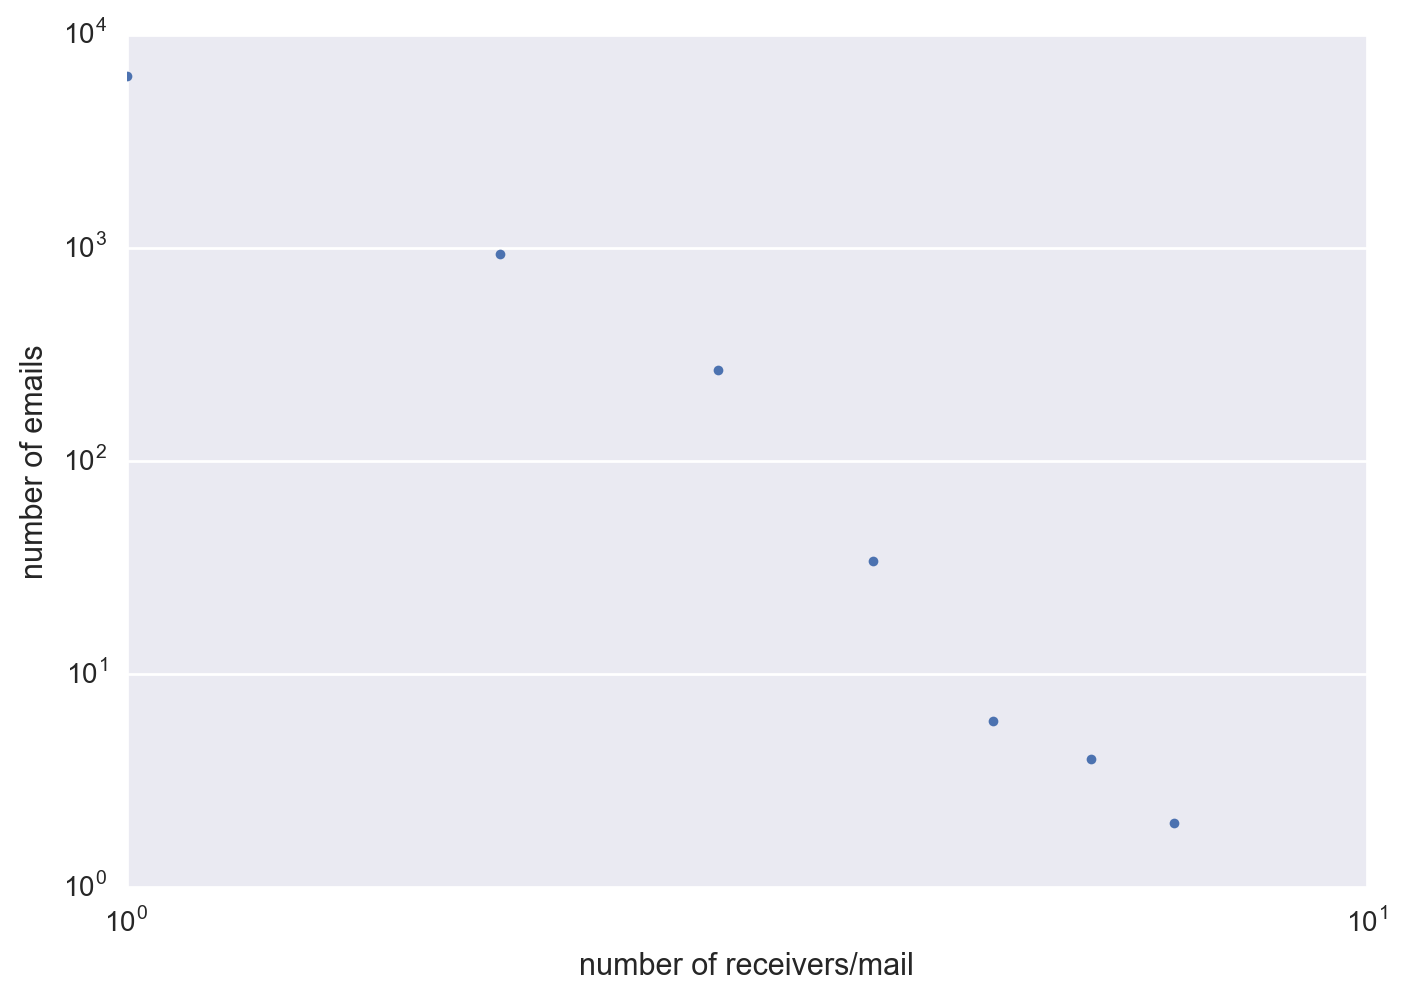

In [32]:
receivers_dist = receivers_df.EmailId.value_counts().value_counts()

plt.loglog(receivers_dist,marker='.',linestyle='')
plt.ylabel('number of emails')
plt.xlabel('number of receivers/mail')

### Distribution of #mail / receivers  
(this could be a good proxy for the degree destribution of the contact network)

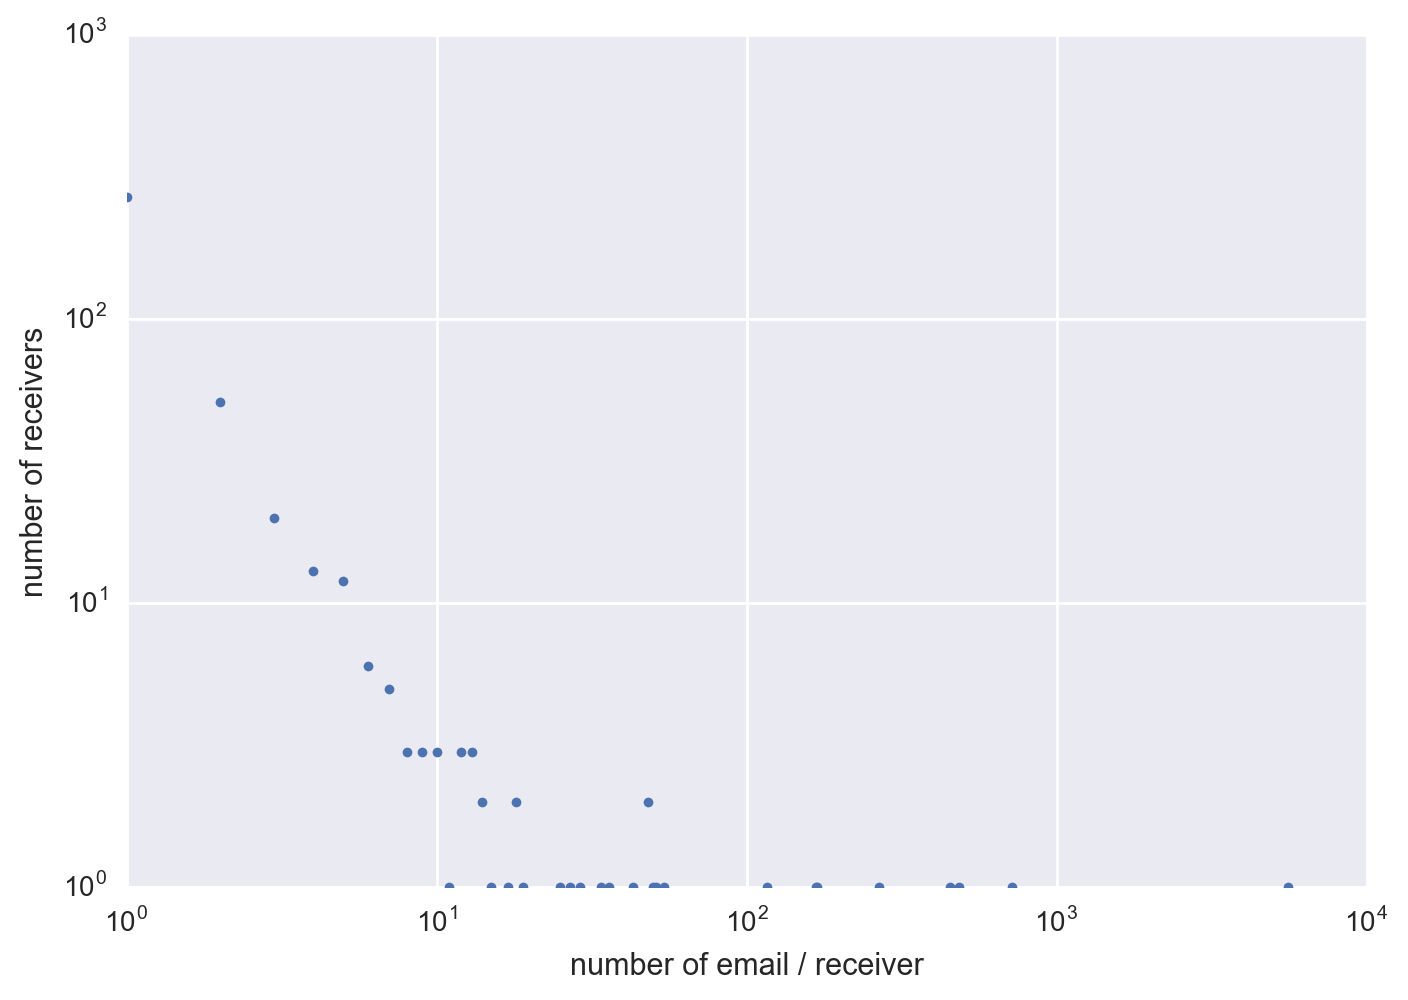

In [34]:
email_dist = receivers_df.PersonId.value_counts().value_counts()

plt.loglog(email_dist,marker='.',linestyle='')
plt.ylabel('number of receivers')
plt.xlabel('number of email / receiver')

## Emails.csv

In [35]:
# Read file
mails_df = pd.read_csv('hillary-clinton-emails/Emails.csv')

# Print global information
print(mails_df.shape)
print(mails_df.dtypes)
print(mails_df.isnull().sum())
mails_df.head()

(7945, 22)
Id                                int64
DocNumber                        object
MetadataSubject                  object
MetadataTo                       object
MetadataFrom                     object
SenderPersonId                  float64
MetadataDateSent                 object
MetadataDateReleased             object
MetadataPdfLink                  object
MetadataCaseNumber               object
MetadataDocumentClass            object
ExtractedSubject                 object
ExtractedTo                      object
ExtractedFrom                    object
ExtractedCc                      object
ExtractedDateSent                object
ExtractedCaseNumber              object
ExtractedDocNumber               object
ExtractedDateReleased            object
ExtractedReleaseInPartOrFull     object
ExtractedBodyText                object
RawText                          object
dtype: object
Id                                 0
DocNumber                          0
MetadataSubject      

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
